<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Метрика-AUC-ROC" data-toc-modified-id="Метрика-AUC-ROC-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Метрика AUC-ROC</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

<b>Признаки</b>\
RowNumber — индекс строки в данных\
CustomerId — уникальный идентификатор клиента\
Surname — фамилия\
CreditScore — кредитный рейтинг\
Geography — страна проживания\
Gender — пол\
Age — возраст\
Tenure — сколько лет человек является клиентом банка\
Balance — баланс на счёте\
NumOfProducts — количество продуктов банка, используемых клиентом\
HasCrCard — наличие кредитной карты\
IsActiveMember — активность клиента\
EstimatedSalary — предполагаемая зарплата

<b>Целевой признак</b>\
Exited — факт ухода клиента

## Подготовка данных

Загрузите и подготовьте данные. Поясните порядок действий.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head() # смотрим 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [4]:
data.info() # информация о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Сразу видим присутствие пропусков в столбце Tenure, заголовки некрасиво написаны, есть ненужные столбцы, которые в нашей модели не пригодятся: 'RowNumber', 'CustomerId', 'Surname'. Попробуем дальше проверить данные на дубликаты, обработаем пропуски, удалим столбцы. Так же посмотрим на столбец Exited, сколько людей покинуло банк.

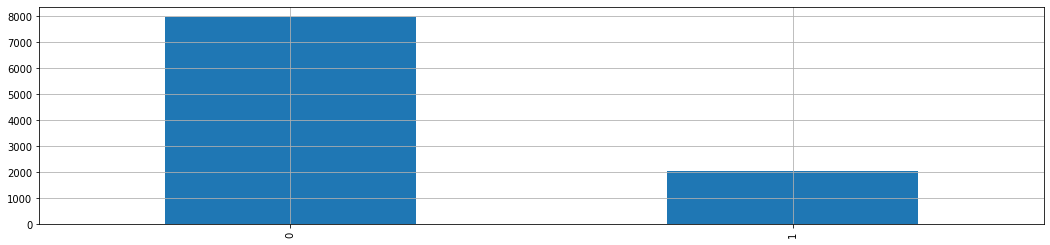

In [5]:
data['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(18,4));

Почти четверть покинула банк в наших данных может указывать на явный дисбаланс в данных. Оставим на будущее этот момент.

In [6]:
data.duplicated().sum() # проверим на явные дубликаты

0

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) # удалим ненужные стобцы

In [8]:
data.columns = data.columns.str.lower() # изменим регистр заголовков на нижний

In [9]:
# переименуем оставшиеся столбцы 
data = data.rename(
    columns={
        'creditscore':'credit_score', 
        'numofproducts':'num_of_products',        
        'hascrcard':'has_cr_card',
        'isactivemember':'is_active_member',
        'estimatedsalary':'estimated_salary',
    } 
)

In [10]:
data.columns # смотрим результат

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

Пропусков в данных примерно 10%, поэтому удалить мы их не можем. Разумным решением будет их замена на медиану.

In [11]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median()) # замена на медиану

In [12]:
data.isna().sum() # проверка

credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

Первичная предобработка готова, но для использования в модели нам необходимо избавиться от категоральных признаков. Используем pd.get_dummies.

In [13]:
data = pd.get_dummies(data, drop_first=True) # заменяем столбцы для модели

In [14]:
data.head() # проверка 

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0


Готово. Теперь разделим выборку на учебную, валидационную и тестовую по правилу 60-20-20.

In [15]:
features = data.drop(['exited'], axis=1) # параметры
target = data['exited'] # целевой параметр

In [16]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.6, random_state=12345) # разделение на тренировочную

In [17]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.2, random_state=12345) # разделение на тестовую и валидационную

Мы разделили выборки и теперь можем переходить к следующему шагу.

## Исследование задачи

Для исследования модели без учета дисбаланса классов сначала стандартизируем данные с помощью StandardScaler и настроим его на тренировочных данных, после этого преобразуем тренировочную и валидационную выборки.

In [18]:
pd.options.mode.chained_assignment = None
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary'] # столбцы с нужными для преобр. данными
 
scaler = StandardScaler() 
scaler.fit(features_train[numeric]) # настройка 
features_train[numeric] = scaler.transform(features_train[numeric]) #изменяем тренировочные и валидационные данные и тестовые
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Теперь обучим логистическую модель согласно новым взвешеным данным и вычислим accuracy, recall, precision и F1 меру.

In [19]:
def model_lr(feature, target):
    model_lr = LogisticRegression(random_state=12345, solver='liblinear')
    model_lr.fit(feature, target)
    predicted_valid = model_lr.predict(features_valid)
    print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

In [20]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_valid = model_lr.predict(features_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.811875 
 F1: 0.32561613144137413 
 Recall: 0.23191489361702128 
 Presicion: 0.5463659147869674


Сразу обучим случайный лес и дерево решений, найдя лучшие гиперпараметры с помощью GridSearchCV и распечатаем результаты.

In [21]:
%%time
max_depth = [int(x) for x in np.linspace(1,50)] # дерево решений от 1 до 50
rf_grid = {'max_depth': max_depth}
model_dtc = GridSearchCV(DecisionTreeClassifier(random_state=12345), rf_grid, scoring = 'f1', cv = 5)
model_dtc.fit(features_train, target_train)
predicted_valid = model_dtc.predict(features_valid)
result = model_dtc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))


 Accuracy 0.8545833333333334 
 F1: 0.556543837357052 
 Recall: 0.46595744680851064 
 Presicion: 0.6908517350157729
CPU times: user 4.26 s, sys: 11.7 ms, total: 4.28 s
Wall time: 4.28 s


In [22]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 51, num = 10)] # случайный лес от 1 до 50
max_depth = [int(x) for x in np.linspace(1, 16, num = 15)]
rf_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
model_rfc = GridSearchCV(RandomForestClassifier(random_state=12345), rf_grid, scoring = 'f1')
model_rfc.fit(features_train, target_train)
predicted_valid = model_rfc.predict(features_valid)
result = model_rfc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.8545833333333334 
 F1: 0.541994750656168 
 Recall: 0.43936170212765957 
 Presicion: 0.7071917808219178
CPU times: user 1min 2s, sys: 386 ms, total: 1min 3s
Wall time: 1min 3s


После испытания трех алгоритмов лучший результат показало дерево решений, где F1 равна 0,55. У случайного дерева очень близко значение равное 0,54, а у логистической регрессии  хуже всего - 0,32. Дальше попробуем разобраться с дисбалансом и посмотрим на результаты.

In [23]:
probabilities_lr=model_lr.predict_proba(features_valid) # рассчеты для логистической регрессии
probabilities_one_valid_lr=probabilities_lr[:,1]
auc_roc_lr=roc_auc_score(target_valid,probabilities_one_valid_lr) #рассчет площади
auc_roc_lr

0.7547175063388821

In [24]:
probabilities_dtc=model_dtc.predict_proba(features_valid) # рассчеты для дерева решений
probabilities_one_valid_dtc=probabilities_dtc[:,1]
auc_roc_dtc=roc_auc_score(target_valid,probabilities_one_valid_dtc) #рассчет площади
auc_roc_dtc

0.8415516481093595

In [25]:
probabilities_rfc=model_rfc.predict_proba(features_valid) # рассчеты для случайного леса
probabilities_one_valid_rfc=probabilities_rfc[:,1]
auc_roc_rfc=roc_auc_score(target_valid,probabilities_one_valid_rfc) #рассчет площади
auc_roc_rfc

0.8279439973542057

При оценке моделей auc-roc получили следующие значения:
- у линейной регрессии 0,754
- у дерева решений 0,841
- у случайного леса 0,827

## Борьба с дисбалансом


В начале указано, что тех, кто ушли из банка клиентов меньше в 4 раза. Попробуем произвести upsampling, увеличив долю ушедших в 4 раза, не забыв перемешать, чтобы данные были рандомизироваными. Создадим функцию:

In [26]:
# функция upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4) # увеличиваем 

Теперь попробуем обучить модель на увеличенной выборке и посмотрим результат

In [28]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_upsampled, target_upsampled)
predicted_valid = model_lr.predict(features_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.6979166666666666 
 F1: 0.4708029197080292 
 Recall: 0.6861702127659575 
 Presicion: 0.35833333333333334


In [29]:
%%time
max_depth = [int(x) for x in np.linspace(1, 51, num = 50)] # дерево решений от 1 до 50
rf_grid = {'max_depth': max_depth}
model_dtc = GridSearchCV(DecisionTreeClassifier(random_state=12345, class_weight='balanced'), rf_grid, scoring = 'f1', cv = 5)
model_dtc.fit(features_upsampled, target_upsampled)
predicted_valid = model_dtc.predict(features_valid)
result = model_dtc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))


 Accuracy 0.7866666666666666 
 F1: 0.47914547304170907 
 Recall: 0.5010638297872341 
 Presicion: 0.4590643274853801
CPU times: user 5.82 s, sys: 4.02 ms, total: 5.82 s
Wall time: 5.83 s


In [30]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 51, num = 10)] # случайный лес от 1 до 50
max_depth = [int(x) for x in np.linspace(1, 26, num = 5)]
rf_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
model_rfc = GridSearchCV(RandomForestClassifier(random_state=12345, class_weight='balanced'), rf_grid, scoring = 'f1')
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc.predict(features_valid)
result = model_rfc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.84875 
 F1: 0.5774155995343423 
 Recall: 0.5276595744680851 
 Presicion: 0.6375321336760925
CPU times: user 30.7 s, sys: 208 ms, total: 30.9 s
Wall time: 30.9 s


In [31]:
probabilities_lr=model_lr.predict_proba(features_valid) # рассчеты для логистической регрессии
probabilities_one_valid_lr=probabilities_lr[:,1]
auc_roc_lr=roc_auc_score(target_valid,probabilities_one_valid_lr) #рассчет площади
auc_roc_lr

0.7586638738838055

In [32]:
probabilities_dtc=model_dtc.predict_proba(features_valid) # рассчеты для дерева решений
probabilities_one_valid_dtc=probabilities_dtc[:,1]
auc_roc_dtc=roc_auc_score(target_valid,probabilities_one_valid_dtc) #рассчет площади
auc_roc_dtc

0.6786407231837724

In [33]:
probabilities_rfc=model_rfc.predict_proba(features_valid) # рассчеты для случайного леса
probabilities_one_valid_rfc=probabilities_rfc[:,1]
auc_roc_rfc=roc_auc_score(target_valid,probabilities_one_valid_rfc) #рассчет площади
auc_roc_rfc

0.8313971723073531

Как мы видим после upsampling и изменения баланса классов у моделей увеличились accuracy и F1, кроме дерева решений, у него метрики упали. 

При оценке моделей мерой auc-roc после исправления дисбаланса в классах и использования upsample получили следующие значения:
- у линейной регрессии 0,758 (значение немного увеличилось)
- у дерева решений 0,67 (сильно упало)
- у случайного леса 0,83 (значение немного увеличилось)

Изменения зеркально отображатся и на F1, и на auc-roc. Где было повышение мера увеличилсь, у дерева решений было уменьшение, здесь оно упало, но сильнее.


Попробуем произвести downsampling и сравним. Алгоритм применим такой же: создадим функцию, применим её к тренировочной выборке и попробуем научить модель по ним. В данном случае попробуем уменьшить до 0.4

In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [35]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.4)

In [36]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr.fit(features_downsampled, target_downsampled)
predicted_valid = model_lr.predict(features_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.700625 
 F1: 0.46797482413920777 
 Recall: 0.6723404255319149 
 Presicion: 0.3588869960249858


In [37]:
%%time
max_depth = [int(x) for x in np.linspace(1, 51, num = 50)] # дерево решений от 1 до 50
rf_grid = {'max_depth': max_depth}
model_dtc = GridSearchCV(DecisionTreeClassifier(random_state=12345, class_weight='balanced'), rf_grid, scoring = 'f1', cv = 5)
model_dtc.fit(features_downsampled, target_downsampled)
predicted_valid = model_dtc.predict(features_valid)
result = model_dtc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))


 Accuracy 0.7725 
 F1: 0.5659777424483307 
 Recall: 0.7574468085106383 
 Presicion: 0.4517766497461929
CPU times: user 2.85 s, sys: 24.2 ms, total: 2.87 s
Wall time: 2.94 s


In [38]:
%%time
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 51, num = 10)] # случайный лес от 1 до 50
max_depth = [int(x) for x in np.linspace(1, 26, num = 5)]
rf_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
model_rfc = GridSearchCV(RandomForestClassifier(random_state=12345, class_weight='balanced'), rf_grid, scoring = 'f1')
model_rfc.fit(features_downsampled, target_downsampled)
predicted_valid = model_rfc.predict(features_valid)
result = model_rfc.score(features_valid, target_valid)
print(' Accuracy', accuracy_score(target_valid, predicted_valid), '\n', 
      "F1:", f1_score(target_valid, predicted_valid), '\n', 
      'Recall:', recall_score(target_valid, predicted_valid),'\n', 
      'Presicion:', precision_score(target_valid, predicted_valid))

 Accuracy 0.8072916666666666 
 F1: 0.5923314235345968 
 Recall: 0.7148936170212766 
 Presicion: 0.5056433408577878
CPU times: user 16.3 s, sys: 104 ms, total: 16.4 s
Wall time: 16.7 s


Логистическая регрессия показала результат 0,467, дерево решений 0,565, а случайное дерево показало лучший результат 0,592. Попробуем повторить такой же результат на тестовой выборке.

## Тестирование модели

Протестируем получившиеся модели на тестовой выборке.

In [39]:
predicted_test = model_lr.predict(features_test) # логистическая регрессия
print(' Accuracy', accuracy_score(target_test, predicted_test), '\n', 
      "F1:", f1_score(target_test, predicted_test), '\n', 
      'Recall:', recall_score(target_test, predicted_test),'\n', 
      'Presicion:', precision_score(target_test, predicted_test))

 Accuracy 0.7091666666666666 
 F1: 0.49493487698986977 
 Recall: 0.6758893280632411 
 Presicion: 0.3904109589041096


In [40]:
predicted_test = model_dtc.predict(features_test) # дерево решений
result = model_dtc.score(features_test, target_test)
print(' Accuracy', accuracy_score(target_test, predicted_test), '\n', 
      "F1:", f1_score(target_test, predicted_test), '\n', 
      'Recall:', recall_score(target_test, predicted_test),'\n', 
      'Presicion:', precision_score(target_test, predicted_test))


 Accuracy 0.7616666666666667 
 F1: 0.5781710914454278 
 Recall: 0.7747035573122529 
 Presicion: 0.4611764705882353


In [41]:
predicted_test = model_rfc.predict(features_test) # случайный лес
result = model_rfc.score(features_test, target_test)
print(' Accuracy', accuracy_score(target_test, predicted_test), '\n', 
      "F1:", f1_score(target_test, predicted_test), '\n', 
      'Recall:', recall_score(target_test, predicted_test),'\n', 
      'Presicion:', precision_score(target_test, predicted_test))

 Accuracy 0.8183333333333334 
 F1: 0.6390728476821191 
 Recall: 0.7628458498023716 
 Presicion: 0.5498575498575499


Видим, что дерево решений и логистическая регрессия в нашем случае показали 0.57 и 0.49 соотв., а случайный лес оказался лучшим с f1 = 0,63

## Метрика AUC-ROC

Для того чтобы построить roc-кривую нам необходимо для каждой модели расситать три значения: FPR, TPR и рассчет порогов. Затем посчитаем площадь и нарисуем кривую.

In [42]:
probabilities_lr=model_lr.predict_proba(features_valid) # рассчеты для логистической регрессии
probabilities_one_valid_lr=probabilities_lr[:,1]
fpr_lr,tpr_lr,thresholds=roc_curve(target_valid,probabilities_one_valid_lr)

In [43]:
auc_roc_lr=roc_auc_score(target_valid,probabilities_one_valid_lr) #рассчет площади

In [44]:
auc_roc_lr

0.7587278139124682

In [45]:
probabilities_dtc=model_dtc.predict_proba(features_valid) # рассчеты для дерева решений
probabilities_one_valid_dtc=probabilities_dtc[:,1]
fpr_dtc,tpr_dtc,thresholds=roc_curve(target_valid,probabilities_one_valid_dtc)

In [46]:
auc_roc_dtc=roc_auc_score(target_valid,probabilities_one_valid_dtc) #рассчет площади

In [47]:
auc_roc_dtc

0.8307393065814134

In [48]:
probabilities_rfc=model_rfc.predict_proba(features_valid) # рассчеты для случайного леса
probabilities_one_valid_rfc=probabilities_rfc[:,1]
fpr_rfc,tpr_rfc,thresholds=roc_curve(target_valid,probabilities_one_valid_rfc)

In [49]:
auc_roc_rfc=roc_auc_score(target_valid,probabilities_one_valid_rfc) #рассчет площади

In [50]:
auc_roc_rfc

0.8541154503362363

<Figure size 432x288 with 0 Axes>

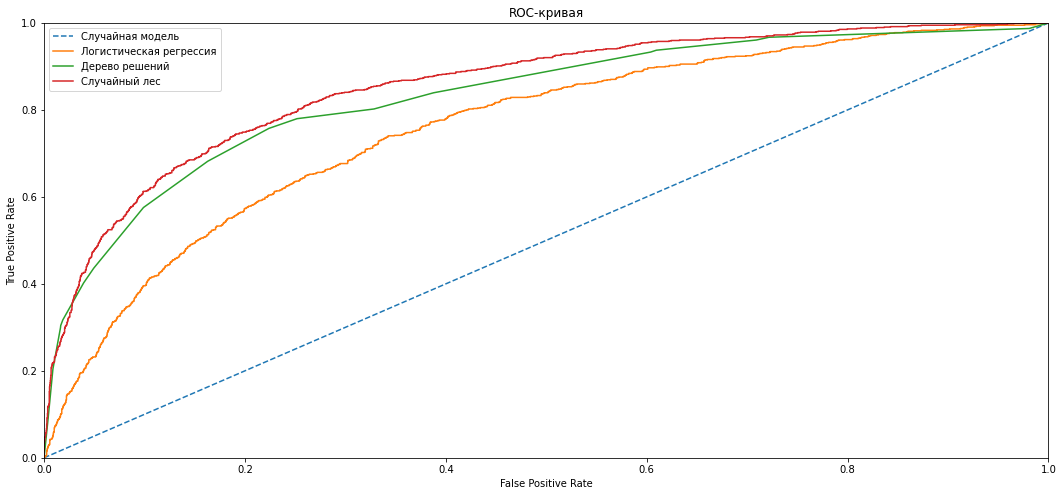

In [51]:
plt.figure() # построик roc-кривую

plt.figure(figsize=(18,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_lr,tpr_lr)
plt.plot(fpr_dtc,tpr_dtc)
plt.plot(fpr_rfc,tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Логистическая регрессия','Дерево решений','Случайный лес'),
           loc= 'upper left') 
plt.show()

При оценке моделей мерой auc-roc после исправления дисбаланса в классах и использования downsample получили следующие значения:
- у линейной регрессии 0,758 (значение немного увеличилось)
- у дерева решений 0,83 (значение немного упало)
- у случайного леса 0,854 (значение увеличилось больше остальных)

По сравнению с изменением F1 меры, у случайного леса обе характеристики повысились, у линейной регрессии F1 резко увеличилась, но auc-roc не сильно изменилась, хоть и в лучшую сторону, а у дерева решенийнесмотря на маленькое увеличение F1, auc-roc наоборот немного упал, но совсем незначительно.

## Общий вывод

В данном исследовании мы сначала попробовали обучить модель с учетом дисбаланса:
- у дерева решений F1 - 0,55,
- у случайного леса F1 - 0,54,
- у логистической регрессии F1 - 0,32.

При оценке моделей auc-roc получили следующие значения:

- у линейной регрессии 0,754
- у дерева решений 0,841
- у случайного леса 0,827

После обучения без учета дисбаланса и применив несколько способов борьбы с ним мы получили такие результаты:
- регрессия - 0.46,
- дерево - 0,56,
- лес - 0,59.

Затем мы проверили наши модели на тестовой выборке, результаты следующие:
- регрессия - 0,49,
- дерево - 0,49,
- лес - 0,63.

Видим, что после последовательных улучшений у модели повысились качественные метрики. Далее мы нарисовали roc-кривую и рассчитали auc_roc метрику:
- регрессия - 0,75,
- дерево - 0,83,
- лес - 0,85.